# Extracción de datos de la API

In [4]:
import requests
import pandas as pd

In [5]:
# Ubicación: Tres de Mayo, Morelos
LATITUDE = 18.8597
LONGITUDE = -99.2190
TIMEZONE = "America/Mexico_City"

# Período: Febrero de 2020 a 2024
YEARS = [2020, 2021, 2022, 2023, 2024]
MONTH = "02"  # Febrero

# Lista de parámetros por hora a solicitar (separados por comas)
hourly_params = "temperature_2m,precipitation,relativehumidity_2m,windspeed_10m,is_day,shortwave_radiation"

In [12]:
def obtener_datos_clima_API(year, month):
    url = f"https://archive-api.open-meteo.com/v1/archive?latitude={LATITUDE}&longitude={LONGITUDE}&start_date={year}-{month}-01&end_date={year}-{month}-27&timezone={TIMEZONE}&hourly={hourly_params}"
    response = requests.get(url)
    data = response.json()
    return data

In [ ]:
dataframes = []

for year in YEARS:
    data = obtener_datos_clima_API(year, MONTH)

    print(data)
    print("\n")

    # Convertir la parte "hourly" del JSON en un DataFrame
    df_year = pd.DataFrame(data["hourly"])

    # Convertir la columna 'time' a datetime
    df_year["time"] = pd.to_datetime(df_year["time"])

    # Extraer año, mes y día correctamente desde la columna 'time'
    df_year["year"] = df_year["time"].dt.year
    df_year["month"] = df_year["time"].dt.month  # Corregido para extraer el mes real
    df_year["day"] = df_year["time"].dt.day  # Extraer día correctamente

    # Agregar el DataFrame a la lista
    dataframes.append(df_year)

    print(f"Datos obtenidos para el año {year}.")

In [14]:
# Unir los datos en un solo DataFrame
df_clima = pd.concat(dataframes, ignore_index=True)

# Visualizar los primeros registros (10 registros por defecto)
df_clima.head()

,time,temperature_2m,precipitation,relativehumidity_2m,windspeed_10m,is_day,shortwave_radiation,year,month,day
0,2020-02-01 00:00:00,15.5,0.0,47,9.5,0,0.0,2020,2,1
1,2020-02-01 01:00:00,15.0,0.0,48,7.9,0,0.0,2020,2,1
2,2020-02-01 02:00:00,15.2,0.0,46,7.2,0,0.0,2020,2,1
3,2020-02-01 03:00:00,15.4,0.0,42,6.7,0,0.0,2020,2,1
4,2020-02-01 04:00:00,15.2,0.0,40,8.1,0,0.0,2020,2,1


In [15]:
# Visualizar los últimos registro (10 registros por defecto)
df_clima.tail()

,time,temperature_2m,precipitation,relativehumidity_2m,windspeed_10m,is_day,shortwave_radiation,year,month,day
3235,2024-02-27 19:00:00,30.3,0.0,12,7.9,0,33.0,2024,2,27
3236,2024-02-27 20:00:00,25.9,0.0,15,7.9,0,0.0,2024,2,27
3237,2024-02-27 21:00:00,22.6,0.0,19,6.4,0,0.0,2024,2,27
3238,2024-02-27 22:00:00,20.8,0.0,21,10.0,0,0.0,2024,2,27
3239,2024-02-27 23:00:00,20.1,0.0,24,9.6,0,0.0,2024,2,27


### 🧹 Limpieza y Organización de los Datos

In [17]:
# Renombrar columnas para mayor claridad
df_clima.rename(columns={
    "temperature_2m": "temperatura",
    "precipitation": "precipitacion",
    "relativehumidity_2m": "humedad_relativa"
}, inplace=True)

📝 **Ejercicio** Renombra las siguientes columnas para mayor claridad:

- `windspeed_10m` → `velocidad_viento`
- `is_day` → `es_dia`
- `shortwave_radiation` → `radiacion_solar`

🔹 Modifica el código para realizar este cambio en el DataFrame `df_weather`.

🔹 Verifica si hay valores nulos (`NaN`) en el conjunto de datos usando `df_weather.isnull().sum()`.

🔹 Revisa estadísticas básicas con `df_weather.describe()`.

In [18]:
# Número de registros duplicados
num_duplicados = df_clima.duplicated().sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


# Carga de información desde GitHub

In [ ]:
url = "https://raw.githubusercontent.com/<archivo>.csv"
df = pd.read_csv(url)
df.head()

# Análisis exploratorio de los datos

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Información del conjunto de datos
df_clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   time                 3240 non-null   datetime64[ns]
 1   temperatura          3240 non-null   float64       
 2   precipitacion        3240 non-null   float64       
 3   humedad_relativa     3240 non-null   int64         
 4   windspeed_10m        3240 non-null   float64       
 5   is_day               3240 non-null   int64         
 6   shortwave_radiation  3240 non-null   float64       
 7   year                 3240 non-null   int32         
 8   month                3240 non-null   int32         
 9   day                  3240 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(2)
memory usage: 215.3 KB


In [21]:
# Lista de columnas numéricas
numerical_columns = ["temperatura", "precipitacion", "humedad_relativa", "windspeed_10m", "shortwave_radiation"]

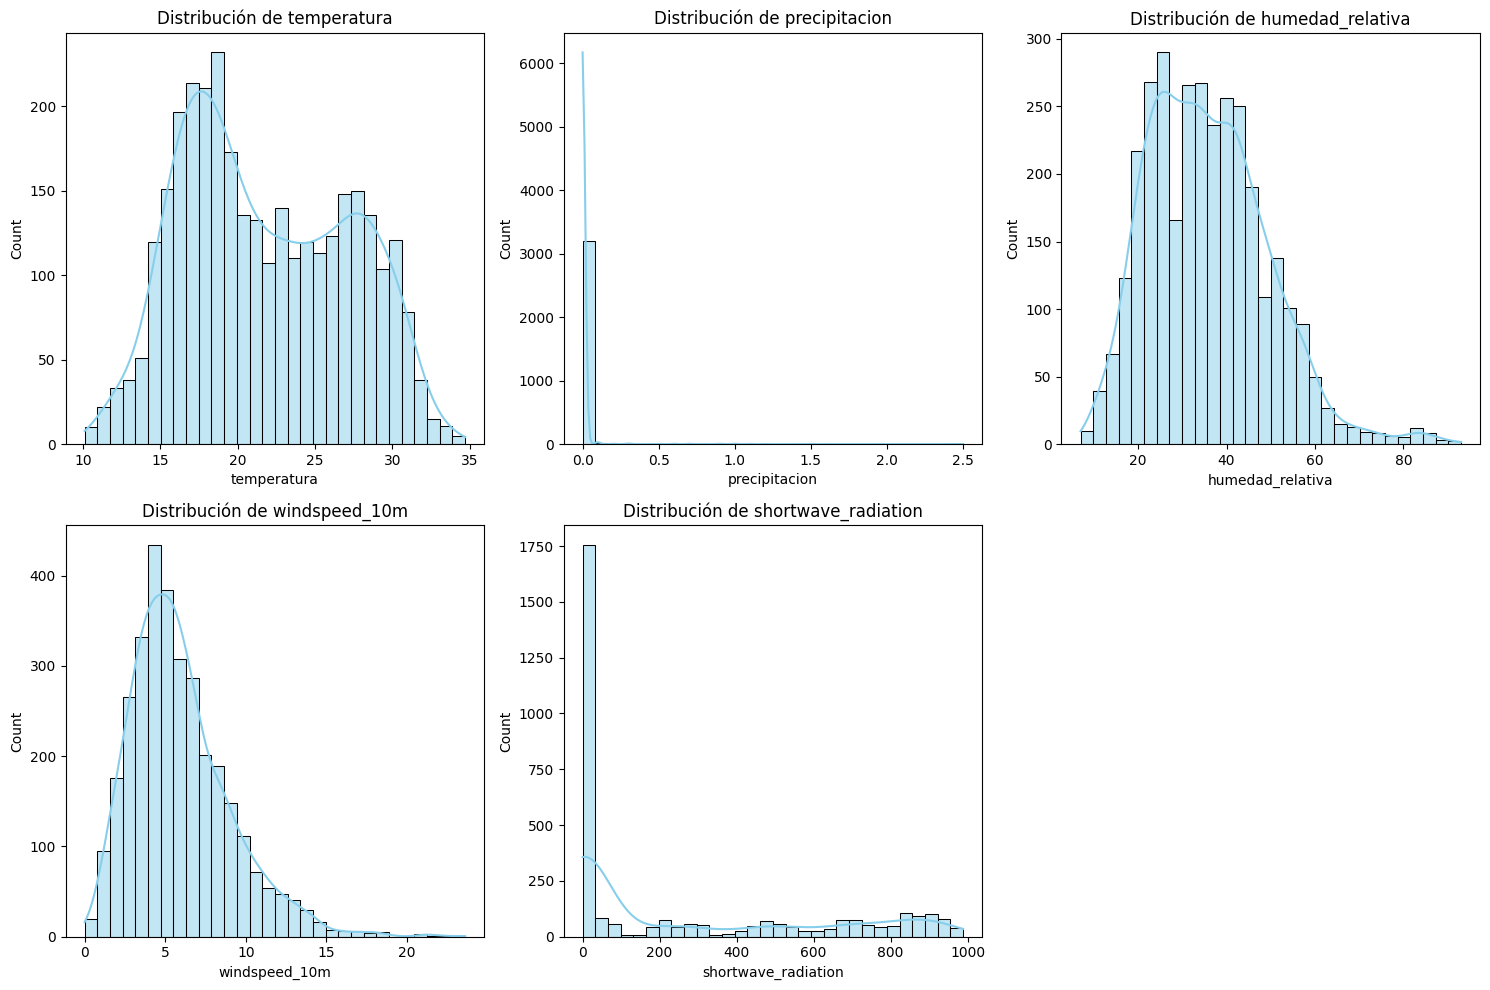

In [22]:
# Configuran el tamaño del gráfico
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_clima[col].dropna(), kde=True, bins=30, color="skyblue")
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()